# Predicting house prices in King County, USA

João Júlio, Contacts: joaodjulio@gmail.com, https://www.linkedin.com/in/joaodjulio/

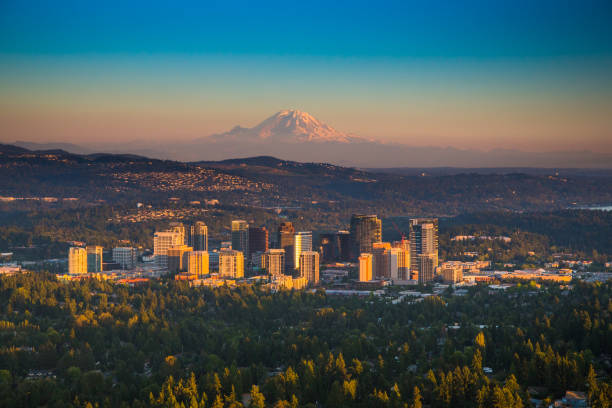

This dataset contains data about the houses sold in King County, including Seattle, between 2014 and 2015 and you can find with at https://www.kaggle.com/harlfoxem/housesalesprediction.

The project is divided in 5 parts:

* [Questions and goals of the project](#Questions-and-goals-of-the-project) <p>
    
* [Features/Variables Description](#Features/Variables-Description) <p>

* [Data Cleaning](#Data-Cleaning) <p>

* [Exploratory Data Analysis](#Exploratory-Data-Analysis) <p>
    
* [Model building](#Model-Building) <p>






# Questions and goals of the project

The main goal of this project is to predict house prices in King County. We are going to do this by fitting a linear regression model!
The other goal is to do a quick EDA and see what we find interesting. When begin this part of the project, I have some questions that I want to be answered:
* **How many houses overlook the waterfront?**
* **How is the data distributed?**
* **What has been the average price of houses sold per month on this dataset?**
* **What has been the number of houses have been sold per month on this dataset?**
<p>
 
Let's go to work!!!

# Features/Variables Description



**These are the variables in our dataset:**

   * **id** - Unique ID for each home sold


   * **date** - Date of the home sale


   * **price** - Price of each home sold


   * **bedrooms** - Number of bedrooms


   * **bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower


   * **sqft_living** - Square footage of the apartments interior living space


   * **sqft_lot** - Square footage of the land space


   * **floors** - Number of floors


   * **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not


   * **view** - An index from 0 to 4 of how good the view of the property was


   * **condition** - An index from 1 to 5 on the condition of the apartment,


   * **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.


   * **sqft_above** - The square footage of the interior housing space that is above ground level


   * **sqft_basement** - The square footage of the interior housing space that is below ground level


   * **yr_built** - The year the house was initially built


   * **yr_renovated** - The year of the house’s last renovation


   * **zipcode** - What zipcode area the house is in


   * **lat** - Lattitude


   * **long** - Longitude


   * **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors


   * **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Data Cleaning

First, we have to have a little bit of a taste of our data and then start to clean that data

In [193]:
library(corrplot)
library(tidyverse)
library(dplyr)
library(lubridate)
library(ggplot2)
library(stringr)
library(ggforce)
library(RColorBrewer)
library(sf)
library(leaflet)
library(lmtest)
library(olsrr)
library(tseries)  
library(MASS)
library(car)
library(Metrics)

In [194]:
df  <- read.csv("kc_house_data.csv", header=TRUE)

In [195]:
head(df)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [196]:
summary(df)

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
                     (Other)        :20833                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

In [197]:
str(df)

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovat

After seeing some data, the descritive summary and the structure of the data we need to:
   * Eliminate the **id** and **zipcode** variables because they are not going to be used
   * Correct the **date format** to taking some conclusions about the time with other variables
   * Correct from integer to categorical the variables **waterfront, view, condition and grade** 
   

### Duplicated id's

In [198]:
df[duplicated(df$id), ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
95,6021501535,20141223T000000,700000,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
315,4139480200,20141209T000000,1400000,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
326,7520000520,20150311T000000,240500,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
347,3969300030,20141229T000000,239900,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
373,2231500030,20150324T000000,530000,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
719,8820903380,20150102T000000,730000,6,2.25,2660,13579,2.0,0,0,...,7,2660,0,1937,1990,98125,47.7142,-122.286,1120,8242
825,726049190,20150218T000000,431000,3,1.00,1810,7200,1.0,0,0,...,7,1130,680,1954,0,98133,47.7493,-122.351,1810,8100
838,8682262400,20150513T000000,419950,2,1.75,1350,4003,1.0,0,0,...,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479
1087,9834200885,20150420T000000,550000,4,2.50,2080,4080,1.0,0,0,...,7,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080
1130,8062900070,20150213T000000,369000,5,1.50,2550,6300,1.0,0,0,...,7,1560,990,1959,0,98056,47.5014,-122.172,1380,6300


In [199]:
df[which(df$id==7853420110),]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21581,7853420110,20141003T000000,594866,3,3,2780,6000,2,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000
21582,7853420110,20150504T000000,625000,3,3,2780,6000,2,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


We found out that some homes were sold more that once in this dataset and for different prices! 
<br>
<br>
<br>

### Dropping Columns

In [200]:
zipcode_data  <- table(df$zipcode)
zipcode_data


98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019 98022 
  362   199   280   317   168   498   141   283   100   195   124   190   234 
98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038 98039 98040 
  499    81   412   283   321   256   274   125   432   545   590    50   282 
98042 98045 98052 98053 98055 98056 98058 98059 98065 98070 98072 98074 98075 
  548   221   574   405   268   406   455   468   310   118   273   441   359 
98077 98092 98102 98103 98105 98106 98107 98108 98109 98112 98115 98116 98117 
  198   351   105   602   229   335   266   186   109   269   583   330   553 
98118 98119 98122 98125 98126 98133 98136 98144 98146 98148 98155 98166 98168 
  508   184   290   410   354   494   263   343   288    57   446   254   269 
98177 98178 98188 98198 98199 
  255   262   136   280   317 

In [201]:
# Drop column id
df <- subset (df, select = -id)

In [202]:
# Drop column zipcode
df <- subset (df, select = -zipcode)

### Fixing time/date data 

In [203]:
head(df)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
20141013T000000,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
20141209T000000,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
20150225T000000,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
20141209T000000,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
20150218T000000,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
20140512T000000,1225000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930


In [204]:
#Eliminating T000000 from the date column
df$date <- str_replace(df$date, "T000000", "") 

In [205]:
# Spliting the year, month and day
year_split  <- str_sub(df$date, 1, 4)
month_split  <- str_sub(df$date, 5, 6)
day_split  <- str_sub(df$date, 7, 8)

In [206]:
#Concatenate the year, month and day by / and then format from string to date 
date_fix <- paste(year_split, month_split, day_split, sep="/")
converted_data  <- as.Date(date_fix)

In [207]:
df$date  <- converted_data

In [208]:
head(df)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
2014-10-13,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
2014-12-09,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2015-02-25,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
2014-12-09,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
2015-02-18,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
2014-05-12,1225000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930


### Convert data to categorical format

In [209]:
df$waterfront <- as.factor(df$waterfront)
df$view <- as.factor(df$view)
df$grade <- as.factor(df$grade)
df$condition  <- as.factor(df$condition)

<br>

# Exploratory Data Analysis

Now we are going to investigate the data and try to seek patterns, see how the different variables are related and distributed and check anomalies in the data.

In [210]:
summary(df)

      date                price            bedrooms        bathrooms    
 Min.   :2014-05-02   Min.   :  75000   Min.   : 0.000   Min.   :0.000  
 1st Qu.:2014-07-22   1st Qu.: 321950   1st Qu.: 3.000   1st Qu.:1.750  
 Median :2014-10-16   Median : 450000   Median : 3.000   Median :2.250  
 Mean   :2014-10-29   Mean   : 540088   Mean   : 3.371   Mean   :2.115  
 3rd Qu.:2015-02-17   3rd Qu.: 645000   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :2015-05-27   Max.   :7700000   Max.   :33.000   Max.   :8.000  
                                                                        
  sqft_living       sqft_lot           floors      waterfront view     
 Min.   :  290   Min.   :    520   Min.   :1.000   0:21450    0:19489  
 1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000   1:  163    1:  332  
 Median : 1910   Median :   7618   Median :1.500              2:  963  
 Mean   : 2080   Mean   :  15107   Mean   :1.494              3:  510  
 3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000        

In [211]:
str(df)

'data.frame':	21613 obs. of  19 variables:
 $ date         : Date, format: "2014-10-13" "2014-12-09" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ view         : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ condition    : Factor w/ 5 levels "1","2","3","4",..: 3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : Factor w/ 12 levels "1","3","4","5",..: 6 6 5 6 7 10 6 6 6 6 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...


In [212]:
head(df)

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
2014-10-13,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
2014-12-09,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2015-02-25,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
2014-12-09,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
2015-02-18,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
2014-05-12,1225000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930


<br>

### Price

After observing the descritive summary, I came to the conclusion that the max price value differs a lot from the median value.

In [213]:
df[order(df$price, decreasing=TRUE),]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
7253,2014-10-13,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,47.6298,-122.323,3940,8800
3915,2014-06-11,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,47.6500,-122.214,3930,25449
9255,2014-09-19,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,47.6305,-122.240,4540,42730
4412,2014-08-04,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,47.6289,-122.233,3560,24345
1449,2015-04-13,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,47.6232,-122.220,4600,21750
1316,2015-04-13,5300000,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,47.5631,-122.210,4320,24619
1165,2014-10-20,5110800,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,47.6767,-122.211,3430,26788
8093,2014-06-17,4668000,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,47.5570,-122.210,3270,10454
2627,2014-08-15,4500000,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,47.7493,-122.280,3030,23408
8639,2014-06-18,4489000,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,47.6208,-122.219,3720,14592


 The top priced houses seem all correct due to the other features of the house!
 <br>
 <br>

 

## Bedrooms

Other problem observed was the fact that the maximum and minimum number of bedrooms numbers differs a lot, and it's wierd to see a house with 33 bedrooms! So we know we plot a table with the number of houses sould with a specific a number of bedrooms:

In [214]:
count_bedrooms <- table(df$bedrooms)
count_bedrooms


   0    1    2    3    4    5    6    7    8    9   10   11   33 
  13  199 2760 9824 6882 1601  272   38   13    6    3    1    1 

In [215]:
df$bedrooms[df$bedrooms == 33] <- 3

Only one house sold had 33 bedrooms and that was probably an error made when storing the data of the house. So I correct it to 3 bedrooms.

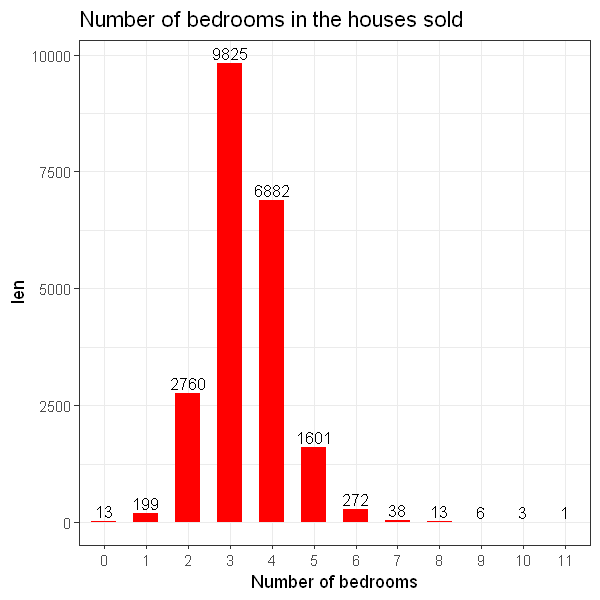

In [216]:
cb <- as.data.frame(table(df$bedrooms))

ggplot(data=cb, aes(x=Var1, y=Freq, fill= Var1)) +
geom_bar(stat="identity",fill="red", width=0.6) +
geom_text(aes(label=Freq), vjust=-0.3, size=3.5) +
theme_bw() +
labs(title="Number of bedrooms in the houses sold", 
        x ="Number of bedrooms", y = "len", fill= "view")


Most of the houses have between 2 and 5 bedrooms, with 3 and 4 being the most common number of bedrooms. Finally, we see that we have some houses that don't have bedrooms and we will eliminate them from our dataset.

In [217]:
# Eliminating houses with 0 bedrooms
df <- df[-which(df$bedrooms == 0),]

## Bathrooms

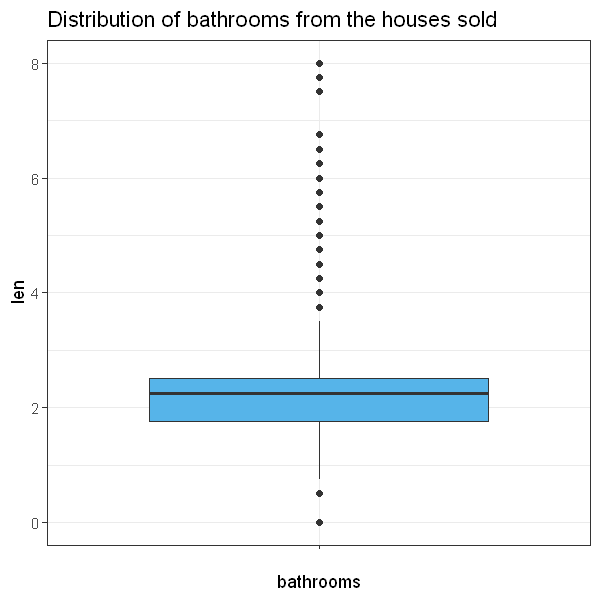

In [218]:
boxplot_bath <- ggplot(df, aes(x="", y=bathrooms)) + 
geom_boxplot(fill="#56B4E9")+
labs(title="Distribution of bathrooms from the houses sold", 
        x ="bathrooms", y = "len")+
theme_bw()

boxplot_bath


In [219]:
as.matrix(table(boxplot.stats(df$bathrooms)$out))

0,3
0.5,4
3.75,155
4,136
4.25,79
4.5,100
4.75,23
5,21
5.25,13
5.5,10
5.75,4


In [220]:
quantile(df$bathrooms)

0%  25%  50%  75% 100% 
0.00 1.75 2.25 2.50 8.00

We see that in this boxplot, some outliers are present. Houses with more than 3.5 bathrooms and less that 0.75 bathrooms are consider outliers but all seem to be correct (except 0's). And the number of bathrooms per house varies from 0.5 (lines with 0 bathrooms are going to be eliminated to 8 bathrooms. So, 75% of the houses have between 0.75 to 2.5 bathrooms!

In [221]:
# Eliminating houses with 0 bathrooms
df <- df[-which(df$bathrooms == 0),]

## Floors

In [222]:
as.matrix(table(df$floors))

1,10673
1.5,1910
2,8235
2.5,161
3,611
3.5,7


In this table we can see that most of the houses have between 1 and 2 floors!

<br>
<br>

## Waterfront

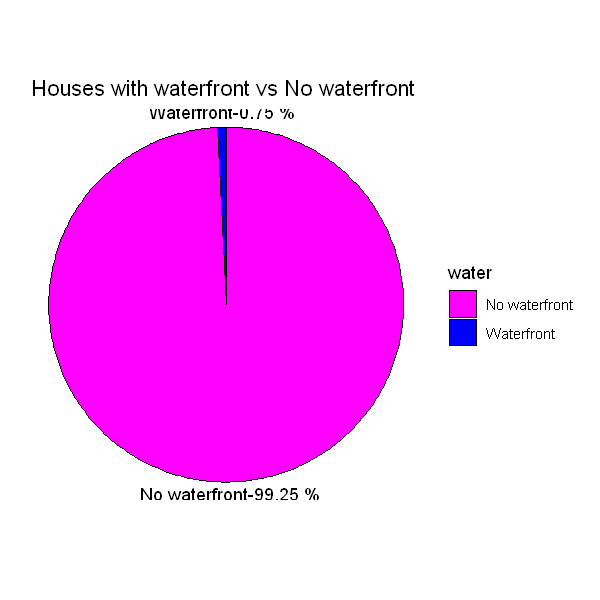

In [223]:
count_waterfront <- table(df$waterfront)
waterf_data <- data.frame(water=c("No waterfront", "Waterfront"),
                len=c(21450 , 163))
waterf_data$Label <- paste(waterf_data$water, paste(round(((waterf_data$len/sum(waterf_data$len))*100),2),"%"), sep='-')
waterf_data <- waterf_data %>% 
  mutate(end = 2 * pi * cumsum(len)/sum(len),
         start = lag(end, default = 0),
         middle = 0.5 * (start + end),
         hjust = ifelse(middle > pi, 0.5, 0.5),
         vjust = ifelse(middle < pi/2 | middle > 3 * pi/2, -0.6, 1.3))

ggplot(waterf_data) + 
  geom_arc_bar(aes(x0 = 0, y0 = 0, r0 = 0, r = 1,
                   start = start, end = end, fill = water)) +
  ggtitle("Houses with waterfront vs No waterfront")+
  geom_text(aes(x = 1 * sin(middle), y = 1 * cos(middle), label = Label,
            hjust = hjust, vjust = vjust)) +
  coord_fixed() +
  theme_minimal()+
  scale_fill_manual(values=c("#FF00FF", "#0000FF"))+
  scale_x_continuous(limits = c(-1, 1),  # Adjust so labels are not cut off
                     name = "", breaks = NULL, labels = NULL) +
  scale_y_continuous(limits = c(-1, 1),      # Adjust so labels are not cut off
                     name = "", breaks = NULL, labels = NULL)

It's easy to see that most of the houses have no waterfront.

## View

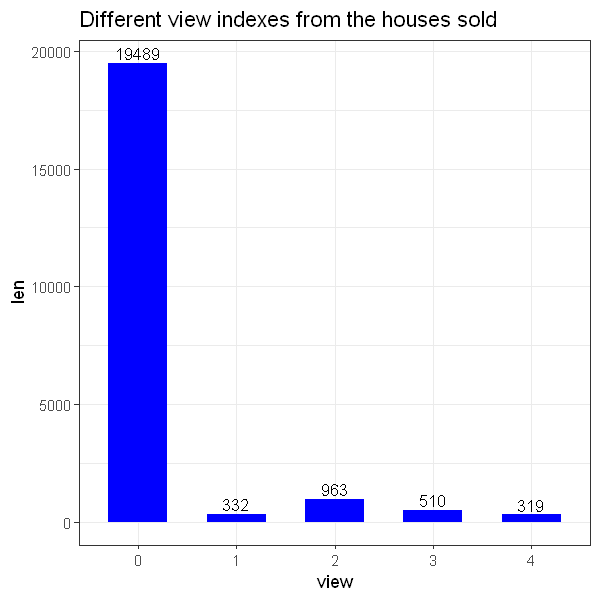

In [224]:
count_view <- table(df$view)
view_data <- data.frame(condition=c(0,1,2,3,4), 
                          len=c(19489,332,963,510,319))

ggplot(data=view_data, aes(x=as.factor(condition), y=len, fill= as.factor(condition))) +
geom_bar(stat="identity",fill="blue", width=0.6) +
geom_text(aes(label=len), vjust=-0.3, size=3.5) +
theme_bw() +
labs(title="Different view indexes from the houses sold", 
        x ="view", y = "len", fill= "view")

We see a lot of 0's, it's weird that 19489 houses have such a bad view rate. So I'm going to eliminate this variable from our data frame.

In [225]:
df <- subset (df, select = -view)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
1,2014-10-13,221900,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
2,2014-12-09,538000,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
3,2015-02-25,180000,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
4,2014-12-09,604000,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
5,2015-02-18,510000,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
6,2014-05-12,1225000,4,4.50,5420,101930,1.0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
7,2014-06-27,257500,3,2.25,1715,6819,2.0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
8,2015-01-15,291850,3,1.50,1060,9711,1.0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
9,2015-04-15,229500,3,1.00,1780,7470,1.0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
10,2015-03-12,323000,3,2.50,1890,6560,2.0,0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


## Grade

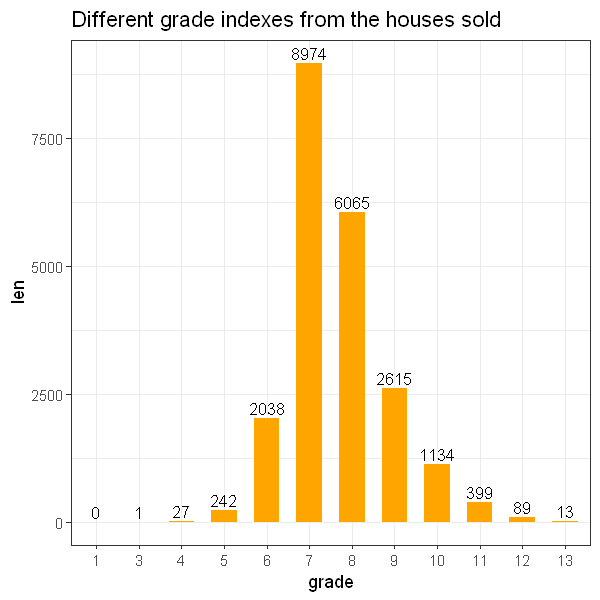

In [226]:
count_grade  <- table(df$grade)
cg <- as.data.frame(count_grade)

ggplot(data=cg, aes(x=Var1, y=Freq, fill= Var1)) +
geom_bar(stat="identity",fill="orange", width=0.6) +
geom_text(aes(label=Freq), vjust=-0.3, size=3.5) +
theme_bw() +
labs(title="Different grade indexes from the houses sold", 
        x ="grade", y = "len", fill= "grade")

We can see that most of the observations are between 7 and 8. We have 13 different classes, because of that I don't think that this is going to be useful to the model. So, we are just going to eliminate this variable/feature from our dataframe:

In [227]:
df <- df[,-10]
summary(df)

      date                price            bedrooms        bathrooms    
 Min.   :2014-05-02   Min.   :  78000   Min.   : 1.000   Min.   :0.500  
 1st Qu.:2014-07-22   1st Qu.: 322000   1st Qu.: 3.000   1st Qu.:1.750  
 Median :2014-10-16   Median : 450000   Median : 3.000   Median :2.250  
 Mean   :2014-10-29   Mean   : 540203   Mean   : 3.372   Mean   :2.116  
 3rd Qu.:2015-02-17   3rd Qu.: 645000   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :2015-05-27   Max.   :7700000   Max.   :11.000   Max.   :8.000  
  sqft_living       sqft_lot           floors      waterfront condition
 Min.   :  370   Min.   :    520   Min.   :1.000   0:21434    1:   29  
 1st Qu.: 1430   1st Qu.:   5040   1st Qu.:1.000   1:  163    2:  170  
 Median : 1910   Median :   7618   Median :1.500              3:14020  
 Mean   : 2080   Mean   :  15099   Mean   :1.494              4: 5677  
 3rd Qu.: 2550   3rd Qu.:  10685   3rd Qu.:2.000              5: 1701  
 Max.   :13540   Max.   :1651359   Max.   :3.500         

## Condition

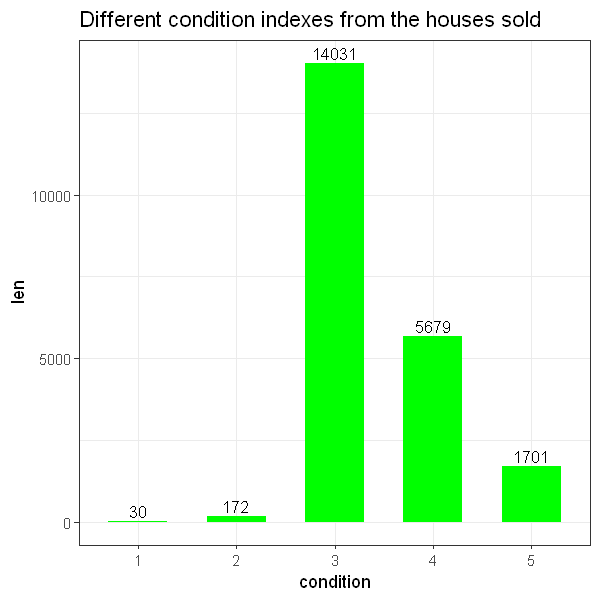

In [228]:
count_condition <- table(df$condition)
condition_data <- data.frame(condition=c(1,2,3,4,5), 
                          len=c(30,172,14031,5679,1701))

ggplot(data=condition_data, aes(x=as.factor(condition), y=len, fill= as.factor(condition))) +
geom_bar(stat="identity",fill="green", width=0.6) +
geom_text(aes(label=len), vjust=-0.3, size=3.5) +
theme_bw() +
labs(title="Different condition indexes from the houses sold", 
        x ="condition", y = "len", fill= "condition")

We can see that
the most common condition index of a house is 3 and that all the observations are between 3 and 5.

## Year renovated

In [229]:
yr_ren_data <- as.data.frame(table(df$yr_renovated))
colnames(yr_ren_data) <- c("Year Renovated", "Number of houses")
as.matrix(yr_ren_data)

Year Renovated,Number of houses
0,20683
1934,1
1940,2
1944,1
1945,3
1946,2
1948,1
1950,2
1951,1
1953,3


Looking at the table, we see that most of the houses have never been renewed!

## Distribution of the data

We are going to plot some histograms with the density curve to see how most of our numerical variables are distributed! It's always good ideia to do this.

In [230]:
summary(df)

      date                price            bedrooms        bathrooms    
 Min.   :2014-05-02   Min.   :  78000   Min.   : 1.000   Min.   :0.500  
 1st Qu.:2014-07-22   1st Qu.: 322000   1st Qu.: 3.000   1st Qu.:1.750  
 Median :2014-10-16   Median : 450000   Median : 3.000   Median :2.250  
 Mean   :2014-10-29   Mean   : 540203   Mean   : 3.372   Mean   :2.116  
 3rd Qu.:2015-02-17   3rd Qu.: 645000   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :2015-05-27   Max.   :7700000   Max.   :11.000   Max.   :8.000  
  sqft_living       sqft_lot           floors      waterfront condition
 Min.   :  370   Min.   :    520   Min.   :1.000   0:21434    1:   29  
 1st Qu.: 1430   1st Qu.:   5040   1st Qu.:1.000   1:  163    2:  170  
 Median : 1910   Median :   7618   Median :1.500              3:14020  
 Mean   : 2080   Mean   :  15099   Mean   :1.494              4: 5677  
 3rd Qu.: 2550   3rd Qu.:  10685   3rd Qu.:2.000              5: 1701  
 Max.   :13540   Max.   :1651359   Max.   :3.500         

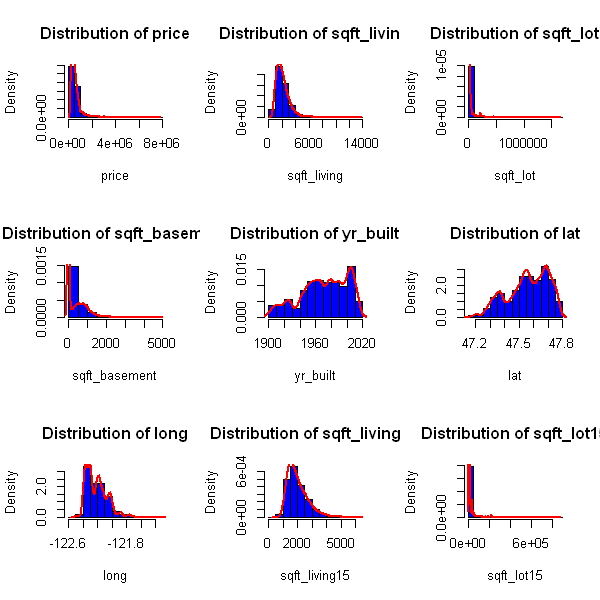

In [231]:
par(mfrow=c(3,3))
hist_data <- c(2,5,6,11,12,14,15,16,17)
for (i in hist_data){
labels_hist <- colnames(df[i])
hist(df[,i], # histogram
 col="blue", # column color
 border="black",
 prob = TRUE, # show densities instead of frequencies
 xlab = str_interp("${labels_hist}"),
 main = str_interp("Distribution of ${labels_hist}"))
lines(density(df[,i]), # density plot
 lwd = 2, # thickness of line
 col = "red")
}

<br>

### Time series data

Just for curiosity, I wanted to see the average price of the houses and the number of houses sold per month between May 2014 and May 2015:

In [232]:
# Creating a new dataframe to store the month, year, average price of the
# houses sold and number of houses sold in that month

df_ts <- df %>%
  mutate(Year = year(date), Month = month(date)) %>%
  group_by(Month, Year) %>%
  summarise(tibble(result = n(), avg_price = mean(price)))

df_ts$dmy  <- paste("01", df_ts$Month, df_ts$Year,sep = "-")
df_ts$dmy <- as.Date(df_ts$dmy,  format = "%d-%m-%Y")
df_ts <- df_ts[order(as.Date(df_ts$dmy, format="%d/%m/%Y")),]


`summarise()` regrouping output by 'Month' (override with `.groups` argument)


In [233]:
# New dataframe for timeseries data
df_ts
sum(df_ts$result)

Month,Year,result,avg_price,dmy
5,2014,1768,548080.3,2014-05-01
6,2014,2178,557417.0,2014-06-01
7,2014,2211,544788.8,2014-07-01
8,2014,1939,536573.4,2014-08-01
9,2014,1771,529661.4,2014-09-01
10,2014,1876,539338.8,2014-10-01
11,2014,1409,522261.9,2014-11-01
12,2014,1470,524658.8,2014-12-01
1,2015,978,525870.9,2015-01-01
2,2015,1247,508451.7,2015-02-01


[1] 21597

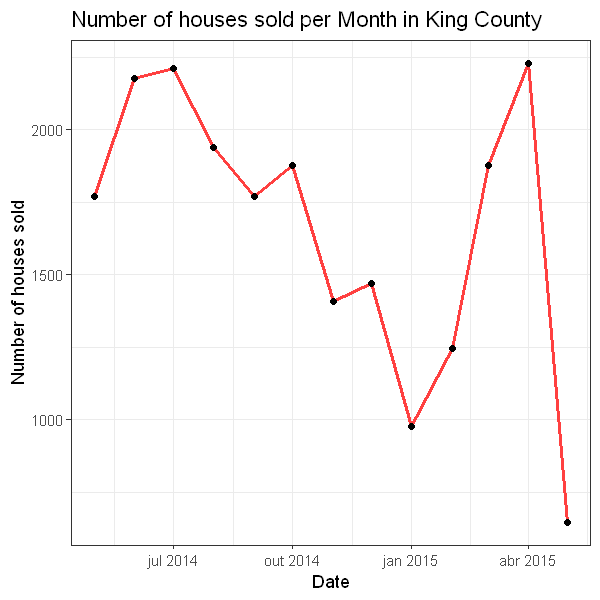

In [234]:
ggplot(data = df_ts, aes(x = dmy, y = result))+
geom_line(color = "brown1", size = 1)+
xlab("Date")+
ylab("Number of houses sold")+
ggtitle("Number of houses sold per Month in King County")+
theme_bw()+
geom_point()

We can see that the number of houses sold between July 2014 and January 2015 was dropping , but after January 2015 it start rising until May where the number of houses sold reached the bottom. At first it look like we had a pattern, where in the "first half" of the year the number of houses sold starts increasing and then until the end of the year drops. But we can't say this because if we look at the last point in our plot, we see that the number of the houses sold hits the bottom in the first half of the year. 
<br>
<br>
<br>

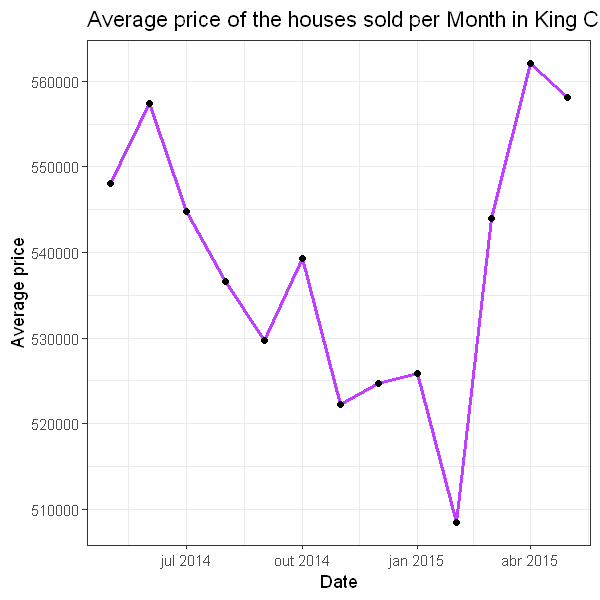

In [235]:
ggplot(data = df_ts, aes(x = dmy, y = avg_price))+
geom_line(color = "darkorchid1", size = 1)+
xlab("Date")+
ylab("Average price")+
ggtitle("Average price of the houses sold per Month in King County")+
theme_bw()+
geom_point()+
scale_y_continuous(labels=function(n){format(n, scientific = FALSE)})

These plots seems to have the same pattern, in the second half of the year the average price of the houses keeps dropping. This makes sense (at least to me), because less houses sold implies that the average price of the houses sold decreases. But looking at the last data point in our plot, we see that the average price is the second highest! This is quite interesting because the number of houses sold on May 2015 was the lowest, with 646 houses sold.

## Map with the location of houses sold

You can zoom in and out, and explore the location of the houses in the dataset!

In [236]:
leaflet(df) %>% setView(lng = -122.3320708 , lat = 47.6062095, zoom = 10) %>% addTiles() %>% addCircleMarkers(radius = 0.1)

Assuming "long" and "lat" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)

<br>

## Correlation matrix, correlation plot and multiple scatter plots

Now we are going to construct a correlation matrix that is going to be use to plot a correlation plot. This is going to help us, check what variables/features have a linear relation with each other! <p>
Finally, we plot multiple scatter plots between our variables/features to check if we are in the presence of any non-linear relations.

In [237]:
summary(df)

      date                price            bedrooms        bathrooms    
 Min.   :2014-05-02   Min.   :  78000   Min.   : 1.000   Min.   :0.500  
 1st Qu.:2014-07-22   1st Qu.: 322000   1st Qu.: 3.000   1st Qu.:1.750  
 Median :2014-10-16   Median : 450000   Median : 3.000   Median :2.250  
 Mean   :2014-10-29   Mean   : 540203   Mean   : 3.372   Mean   :2.116  
 3rd Qu.:2015-02-17   3rd Qu.: 645000   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :2015-05-27   Max.   :7700000   Max.   :11.000   Max.   :8.000  
  sqft_living       sqft_lot           floors      waterfront condition
 Min.   :  370   Min.   :    520   Min.   :1.000   0:21434    1:   29  
 1st Qu.: 1430   1st Qu.:   5040   1st Qu.:1.000   1:  163    2:  170  
 Median : 1910   Median :   7618   Median :1.500              3:14020  
 Mean   : 2080   Mean   :  15099   Mean   :1.494              4: 5677  
 3rd Qu.: 2550   3rd Qu.:  10685   3rd Qu.:2.000              5: 1701  
 Max.   :13540   Max.   :1651359   Max.   :3.500         

In [238]:
cor_data  <- df[, c(2,3,4,5,6,7,11,12,13,14,15,16,17)]
cormat <- round(cor(cor_data),2)
cormat

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.00,0.32,0.53,0.70,0.09,0.26,0.32,0.05,0.13,0.31,0.02,0.59,0.08
bedrooms,0.32,1.00,0.53,0.59,0.03,0.18,0.31,0.16,0.02,-0.01,0.14,0.40,0.03
bathrooms,0.53,0.53,1.00,0.76,0.09,0.50,0.28,0.51,0.05,0.02,0.22,0.57,0.09
sqft_living,0.70,0.59,0.76,1.00,0.17,0.35,0.44,0.32,0.06,0.05,0.24,0.76,0.18
sqft_lot,0.09,0.03,0.09,0.17,1.00,0.00,0.02,0.05,0.01,-0.09,0.23,0.14,0.72
floors,0.26,0.18,0.50,0.35,0.00,1.00,-0.25,0.49,0.01,0.05,0.13,0.28,-0.01
sqft_basement,0.32,0.31,0.28,0.44,0.02,-0.25,1.00,-0.13,0.07,0.11,-0.14,0.20,0.02
yr_built,0.05,0.16,0.51,0.32,0.05,0.49,-0.13,1.00,-0.22,-0.15,0.41,0.33,0.07
yr_renovated,0.13,0.02,0.05,0.06,0.01,0.01,0.07,-0.22,1.00,0.03,-0.07,0.00,0.01
lat,0.31,-0.01,0.02,0.05,-0.09,0.05,0.11,-0.15,0.03,1.00,-0.14,0.05,-0.09


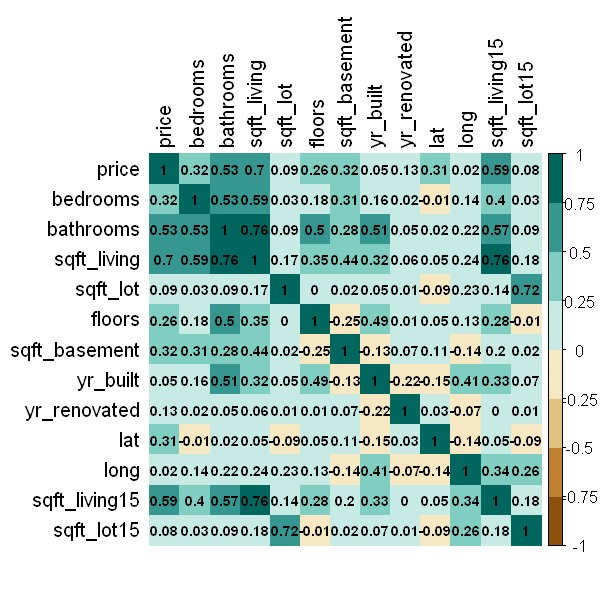

In [239]:

corrplot(cormat, method = "color", col = brewer.pal(n=8, name="BrBG"),
         number.cex = .7,
         addCoef.col = "black", 
         tl.col = "black", tl.srt = 90)

Looking to the correlation plot, we see that our **dependent/target variable price** has a moderate positive correlation between **bathrooms, sqft_living, sqft_above and sqft_living15**. **sqft_living15** 

Now we are going to look to the independent variables:

* **bathrooms**: highly correlated - **sqft_living** and **sqft_above**. 
* **sqft_living**: highly correlated - **sqft_above**, **bathrooms**, **sqft_livng15**.
* **sqft_above**: highly correlated - **sqft_living** and **sqft_livng15**.
* **sqft_lot**: highly correlated - **sqft_lot15**
* **sqft_living15**: highly correlated - **sqft_living** and **sqft_above**
* **sqft_lot**: highly correlated - **sqft_lot15**



We see that we are probalby going to **have a problem, called multicolinearity**. This happens when **we have some features/variables that are related to each other** and because of that, **the model will find it hard to detect what was the feature/variable that had impact on the model**. In other words, **features/variables are fighting for significance in the model**.
For example, we saw that the features **sqft_living and sqft_above had an high correlation**. In the real world it makes sense,
more square footage of the interior housing space is related to more square footage of the interior housing space that is above ground level... In other words **bigger the living space, bigger living space above ground level**.

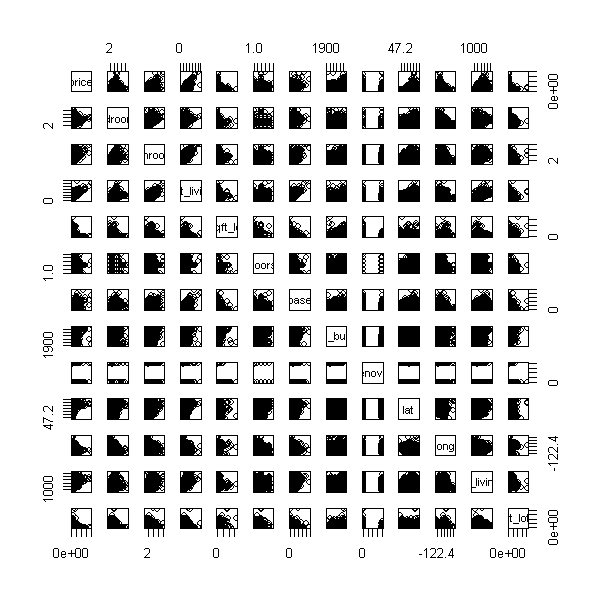

In [240]:
pairs(cor_data)

We see some non-linear relations between the target variable and the independent variables:
* **sqft_lot**
* **lat**
* **long**
* **sqft_lot15**
* **floors**

# Model Building

So this is the last part of our project, what we are going to do first is split our data in to a training and test set. Then we will try to fit a linear regression model that can predict with accuracy the price of a house.

## Spliting the data into a training and test set

In [241]:
## 75% of the sample size
model_df <- df[,-1]
smp_size <- floor(0.75 * nrow(model_df))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(model_df)), size = smp_size)

train <- model_df[train_ind, ]
train <- train[order(as.numeric(rownames(train))),,drop=FALSE]
test <- model_df[-train_ind, ]

## Training the model

In [242]:
# This model couldn't be runned!

#model1 <- lm(price~., data=train)
#summary(model1)
#bptest(model1) # test for heteroskesdasticity
#bgtest(model1) # test for auto-correlation
#jarque.bera.test(model1$residuals) # test for normality of the residuals
#vif(model1) # multicolinieraty

#options(repr.plot.width=5, repr.plot.height=5)
#par(mfrow=c(2,2)) 
#plot(model1)

Because we have a dependent variable our model is not working, this means that we have a variable that is a combination of other variables. Because of that the model doesn't work and so we have to eliminate that variable!<p>

After that we create a new model without this variable.

In [243]:
train <- train[,-which(names(train) %in% c("sqft_basement"))]

test <- test[,-which(names(test) %in% c("sqft_basement"))]


Call:
lm(formula = price ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1290346  -109307   -11428    84987  4158960 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -5.417e+07  1.919e+06 -28.235  < 2e-16 ***
bedrooms      -5.565e+04  2.417e+03 -23.022  < 2e-16 ***
bathrooms      5.782e+04  4.027e+03  14.359  < 2e-16 ***
sqft_living    2.083e+02  5.260e+00  39.604  < 2e-16 ***
sqft_lot       2.931e-01  6.139e-02   4.775 1.81e-06 ***
floors         1.563e+04  4.427e+03   3.530 0.000417 ***
waterfront1    6.749e+05  2.016e+04  33.471  < 2e-16 ***
condition2     5.279e+04  5.081e+04   1.039 0.298831    
condition3     6.991e+04  4.724e+04   1.480 0.138907    
condition4     1.049e+05  4.725e+04   2.220 0.026457 *  
condition5     1.399e+05  4.753e+04   2.943 0.003253 ** 
sqft_above     4.251e+01  5.259e+00   8.083 6.75e-16 ***
yr_built      -1.855e+03  8.802e+01 -21.074  < 2e-16 ***
yr_renovated   2.955e+01  4.529e+00   


	studentized Breusch-Pagan test

data:  model2
BP = 2307.6, df = 17, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  model2
LM test = 0.020274, df = 1, p-value = 0.8868



	Jarque Bera Test

data:  model2$residuals
X-squared = 1025540, df = 2, p-value < 2.2e-16


,GVIF,Df,GVIF^(1/(2*Df))
bedrooms,1.655930,1,1.286830
bathrooms,3.369322,1,1.835571
sqft_living,8.264062,1,2.874728
sqft_lot,2.320821,1,1.523424
floors,1.980860,1,1.407430
waterfront,1.033108,1,1.016419
condition,1.332840,4,1.036567
sqft_above,6.722379,1,2.592755
yr_built,2.316395,1,1.521971
yr_renovated,1.151140,1,1.072912


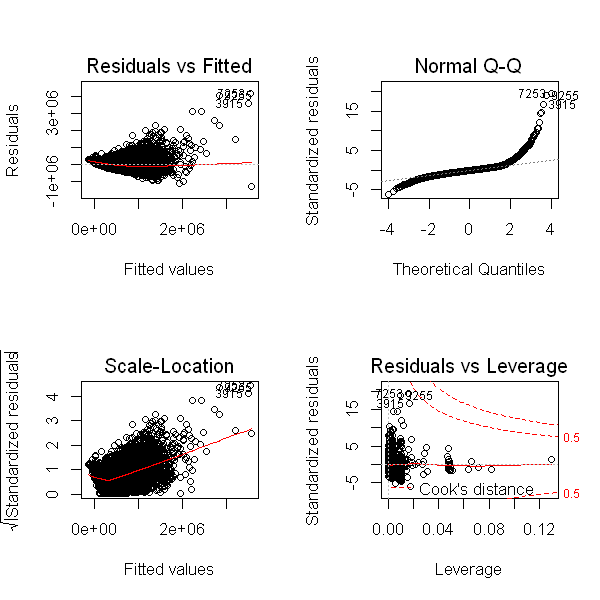

In [244]:
model2 <- lm(price~., data=train)
summary(model2)
bptest(model2) # test for heteroskesdasticity
bgtest(model2) # test for auto-correlation
jarque.bera.test(model2$residuals) # test for normality of the residuals
vif(model2) # multicolinieraty

options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(2,2)) 
plot(model2)

Looking at the model2, we can basically see that we are in the presence of heteroskedasticity, we have some outliers that are probably disturbing our regression (this is a model very sensible to outliers) and that our residuals are not normally distributed (not a big deal in prediction). One positive fact is that our model doesn't seem to have any auto-correlation between the residuals and the Breusch–Godfrey test says the same. Our R-squared looks ok but I think we can do better. <p>
So we can try to fix the heteroskedasticity in our model by log the target/independent variable. This will help us "reduce" the scale of the price, that is in a big scale in comparison with the scale of the other variables. 


Call:
lm(formula = log(price) ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.39286 -0.17323  0.00055  0.17150  1.37075 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -8.073e+01  2.465e+00 -32.750  < 2e-16 ***
bedrooms      -3.800e-02  3.105e-03 -12.237  < 2e-16 ***
bathrooms      9.278e-02  5.173e-03  17.935  < 2e-16 ***
sqft_living    2.331e-04  6.758e-06  34.499  < 2e-16 ***
sqft_lot       7.613e-07  7.886e-08   9.653  < 2e-16 ***
floors         9.214e-02  5.687e-03  16.202  < 2e-16 ***
waterfront1    5.561e-01  2.590e-02  21.469  < 2e-16 ***
condition2     1.924e-01  6.528e-02   2.947  0.00322 ** 
condition3     3.681e-01  6.069e-02   6.065 1.35e-09 ***
condition4     4.383e-01  6.070e-02   7.221 5.39e-13 ***
condition5     5.058e-01  6.106e-02   8.283  < 2e-16 ***
sqft_above     1.100e-05  6.756e-06   1.628  0.10353    
yr_built      -2.201e-03  1.131e-04 -19.461  < 2e-16 ***
yr_renovated   5.045e-05  5.818e-


	studentized Breusch-Pagan test

data:  model3
BP = 1032.4, df = 17, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  model3
LM test = 1.2344, df = 1, p-value = 0.2666



	Jarque Bera Test

data:  model3$residuals
X-squared = 709.35, df = 2, p-value < 2.2e-16


,GVIF,Df,GVIF^(1/(2*Df))
bedrooms,1.655930,1,1.286830
bathrooms,3.369322,1,1.835571
sqft_living,8.264062,1,2.874728
sqft_lot,2.320821,1,1.523424
floors,1.980860,1,1.407430
waterfront,1.033108,1,1.016419
condition,1.332840,4,1.036567
sqft_above,6.722379,1,2.592755
yr_built,2.316395,1,1.521971
yr_renovated,1.151140,1,1.072912


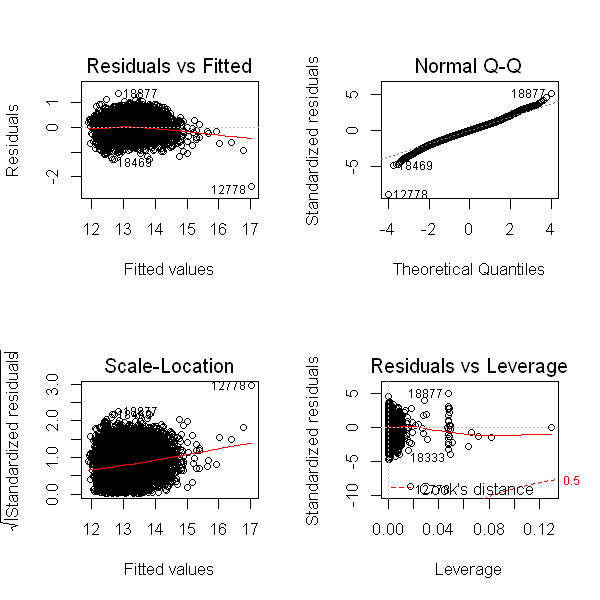

In [245]:
model3 <- lm(log(price)~., data=train)
summary(model3)
bptest(model3) # test for heteroskesdasticity
bgtest(model3) # test for auto-correlation
jarque.bera.test(model3$residuals) # test for normality of the residuals
vif(model3) # multicolinieraty

options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(2,2)) 
plot(model3)

Looking at the plots the residuals seem to have no heteroskedasticity but the test fails, probably because we are in the presence of one big outlier. Normality seems to be verified but test fails, because of the presence of the outlier. Our R-squared increased and that's very good! So now I will try to do other models with non linear relations in the indepedent varibles trying to increase the R-squared of the model.


Call:
lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living * 
    sqft_above + I(1/sqft_lot) + floors + waterfront + log(yr_built) + 
    yr_renovated + lat + long + sqft_living15 + sqft_lot15, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41109 -0.17096  0.00186  0.16992  1.22306 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -2.072e+01  3.404e+00  -6.088 1.17e-09 ***
bedrooms               -4.362e-02  3.208e-03 -13.595  < 2e-16 ***
bathrooms               9.150e-02  5.155e-03  17.749  < 2e-16 ***
sqft_living             3.200e-04  7.860e-06  40.710  < 2e-16 ***
sqft_above              1.497e-04  9.200e-06  16.274  < 2e-16 ***
I(1/sqft_lot)           3.258e+02  1.856e+01  17.550  < 2e-16 ***
floors                  4.924e-03  6.865e-03   0.717    0.473    
waterfront1             5.943e-01  2.589e-02  22.957  < 2e-16 ***
log(yr_built)          -6.725e+00  2.130e-01 -31.575  < 2e-16 ***
yr_r


	studentized Breusch-Pagan test

data:  model4
BP = 671.64, df = 14, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  model4
LM test = 1.9711, df = 1, p-value = 0.1603



	Jarque Bera Test

data:  model4$residuals
X-squared = 410.2, df = 2, p-value < 2.2e-16


bedrooms              bathrooms            sqft_living 
              1.773809               3.357774              11.219576 
            sqft_above          I(1/sqft_lot)                 floors 
             12.510537               2.324076               2.896648 
            waterfront          log(yr_built)           yr_renovated 
              1.035645               2.138470               1.113418 
                   lat                   long          sqft_living15 
              1.115070               1.520978               2.718709 
            sqft_lot15 sqft_living:sqft_above 
              1.144012              11.116641

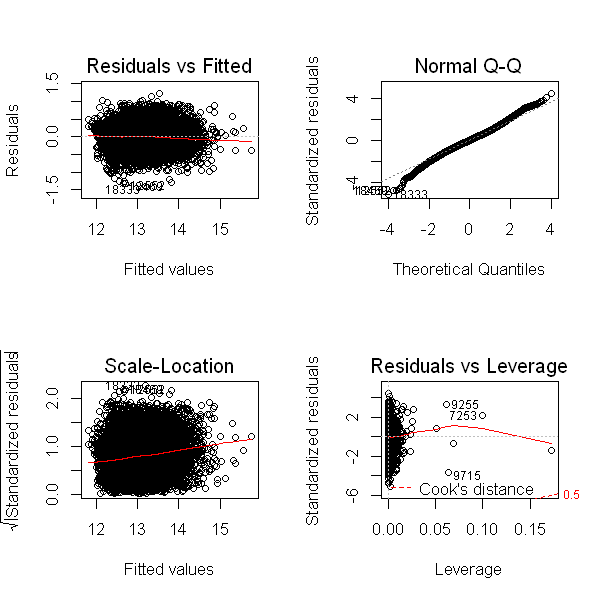

In [246]:
model4 <- lm(log(price)~ bedrooms + bathrooms + sqft_living*sqft_above + I(1/sqft_lot)+ floors + waterfront + 
             log(yr_built) + yr_renovated + lat + long + sqft_living15 + sqft_lot15 , data=train)
summary(model4)
bptest(model4) # test for heteroskesdasticity
bgtest(model4) # test for auto-correlation
jarque.bera.test(model4$residuals) # test for normality of the residuals
vif(model4) # multicolinieraty

options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(2,2)) 
plot(model4)


Call:
lm(formula = log(price) ~ bedrooms + bathrooms + I(bathrooms^2) + 
    floors + sqft_living * sqft_above + waterfront + log(yr_built) + 
    yr_renovated + sqrt(lat) + I(1/long) + sqft_living15 + sqft_lot15 + 
    sqft_lot, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45364 -0.17415  0.00034  0.17548  1.24179 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -5.383e+01  3.044e+00 -17.686  < 2e-16 ***
bedrooms               -4.787e-02  3.215e-03 -14.889  < 2e-16 ***
bathrooms               1.421e-01  1.439e-02   9.872  < 2e-16 ***
I(bathrooms^2)         -9.299e-03  2.832e-03  -3.284  0.00102 ** 
floors                  7.233e-02  5.728e-03  12.626  < 2e-16 ***
sqft_living             3.003e-04  8.327e-06  36.057  < 2e-16 ***
sqft_above              7.880e-05  9.102e-06   8.658  < 2e-16 ***
waterfront1             5.736e-01  2.602e-02  22.046  < 2e-16 ***
log(yr_built)          -5.934e+00  2.116e-


	studentized Breusch-Pagan test

data:  model5
BP = 820.32, df = 15, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  model5
LM test = 1.4881, df = 1, p-value = 0.2225



	Jarque Bera Test

data:  model5$residuals
X-squared = 351.81, df = 2, p-value < 2.2e-16


bedrooms              bathrooms         I(bathrooms^2) 
              1.759860              25.848065              23.576027 
                floors            sqft_living             sqft_above 
              1.992100              12.437768              12.093875 
            waterfront          log(yr_built)           yr_renovated 
              1.033138               2.084111               1.113818 
             sqrt(lat)              I(1/long)          sqft_living15 
              1.088318               1.457077               2.718354 
            sqft_lot15               sqft_lot sqft_living:sqft_above 
              2.351533               2.320261              17.284896

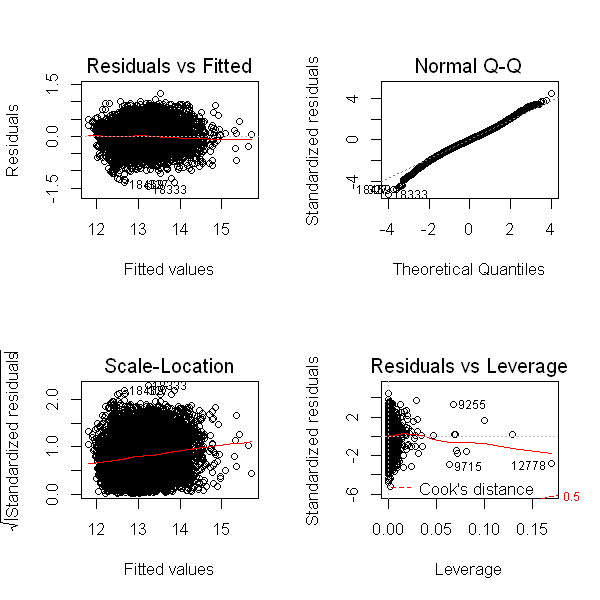

In [247]:
model5 <- lm(log(price)~ bedrooms + bathrooms + I(bathrooms^2) + floors + sqft_living*sqft_above + waterfront + 
             log(yr_built) + yr_renovated + sqrt(lat) + I(1/long) + sqft_living15 + sqft_lot15 + sqft_lot , data=train)
summary(model5)
bptest(model5) # test for heteroskesdasticity
bgtest(model5) # test for auto-correlation
jarque.bera.test(model5$residuals) # test for normality of the residuals
vif(model5) # multicolinieraty

options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(2,2)) 
plot(model5)

So in this last two models, model4 and model5, we tried to increase our R-squared by doing polynomial transformations, log, squared root and interactions between our independent variables. We get a little better results than in model3, but the difference is not absurd. The tests of homoscedasticity and normal distribution of the residuals failed, but mostly because of the presence of some outliers. Now, we are going to test this models and see how effective they are.

## Testing the model

In [248]:
# Testing model 2

pr2 <-predict(model2,test)
actual2<-test$price

RMSE2 <- rmse(actual2, pr2)
MAPE2 <- mape(actual2, pr2)

In [249]:
# Testing model 3

pr3 <-predict(model3,test)
prediction3 <- exp(pr3)
actual3 <- test$price

RMSE3 <- rmse(actual3, prediction3)
MAPE3 <- mape(actual3, prediction3)


In [250]:
# Testing model 4

pr4 <- predict(model4,test)
prediction4 <- exp(pr4)
actual4 <- test$price

RMSE4 <- rmse(actual4, prediction4)
MAPE4 <- mape(actual4, prediction4)

In [251]:
# Testing model 5

pr5 <- predict(model5,test)
summary(pr5)
prediction5 <- exp(pr5)
actual5 <- test$price

RMSE5 <- rmse(actual5, prediction5)
MAPE5 <- mape(actual5, prediction5)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.88   12.74   13.01   13.05   13.32   15.30 

In [252]:
MAPE <- c(MAPE2,MAPE3,MAPE4,MAPE5)
RMSE <- c(RMSE2,RMSE3,RMSE4,RMSE5)
AICs <- c(AIC(model2),AIC(model3),AIC(model4),AIC(model5))
Adj_R_squared <- c(summary(model2)$adj.r.squared, summary(model3)$adj.r.squared, summary(model4)$adj.r.squared, summary(model5)$adj.r.squared)
cbind(MAPE,RMSE,AICs,R_squared,Adj_R_squared)

MAPE,RMSE,AICs,R_squared,Adj_R_squared
0.2750080,212869.1,443822.795,0.6668277,0.6541371
0.2220644,210422.0,4398.279,0.7326730,0.7232965
0.2207193,202586.0,4337.620,0.7339178,0.7242798
0.2240820,204263.1,4540.078,0.7300190,0.7208290


So looking to all the metrics, we see that 3th and 4th model are very close in all (in two last lines of our table) and they have the highest metrics of all 4 models. But if, we had to choose one we would probably go with **model4** (in the third line) because it has the highest **Adjusted R-Squared** (unlike R-Square this measure takes into account the degrees of freedom, that is, it takes into account the extra variables in our model), **RMSE** (the standart deviation of the predicted price from the actual price), **MAPE** (the standart deviation of the predicted price from the actual price) and the **lowest AIC** (AIC is a metric that lower the better, because its related to the number of parameters and log likelihood). <p>

The metrics that actually matter in the perfomance of the model in predicting house prices are **MAPE** and **RMSE**. We will interprete this metrics:
* **MAPE** = 0.2207193, on average we will fail the actual price of the house by 22% of it's value.
* **RMSE** = 202586.0, the standart deviation of the actual price is 202586 dollars. This means that if we predict the price of some house, we will be off, on average, by 202586 dollars. UAUUUUU that's a lot!

So, not even our best model is that accurate on predicting house prices.    
    
I will put the formulas down here to the ones who like to know, and I will explain a little bit better the intuiton behind AIC:

$R^{2}_{adj}$$ = 1 - $$\frac{(1-$R^{2})(n-1)}{n-k-1}$, $n  =$ Number of observations and $k = $ number of indepedent regressors

**Adjusted R-squared is better in multiple linear regression** because it takes into account the number of independent variables in our model and how significant the model becomes when we had more variables. R-squared doesn't take that to account! 

$M $ = $\frac{1}{n}$ $
\sum_{i = 1}^{n}|{\frac{ A_{t} - F{t}}{A_{t}}}|
$, $A_t = $ Actual value and $F_t = $ Forecast value

$ RMSE $ = $\sqrt{ \frac{\sum_{i = 1}^{n} (\hat{y_i} - y_i)}{n} }$, $n$ = number of observations, $y_i$ = the observed value for the ith observation and $\hat{y_i}$ = predict value for the ith observation

$AIC$ = $ 2k - ln(\hat{L}) $, $k =$ number of parameters in the model and $\hat{L} =$ likelihood function

The intuition behind **AIC** is that, it penalizes the model when more variables are added and the goodness of fit (it's given by likelihood funtion) stays the same. So, AIC wants a model with relatively few parameters and the model should fit the data really well too ( high log likelihood). Lower AIC, better the model relatively to the others with higher AIC.